## OVERVIEW:

* This project aims to segement the customers based on thier buying behaviour.


* RFM analysis is carried out in order to segment the customer's.


* R -- Recency(How recent was the customer's last purchase?)

  F -- Frequency(How often does the customer purchases ?)
  
  M -- Monetary(How much does the customer spend ?)


* Based on this each customer is given a RFM score which determines the loyalty. 

## Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Reading  and checking the data:

In [2]:
data = pd.read_csv('E-com_Data.csv')

In [3]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


OBSERVATIONS:

    * Date of purchase is having object as data type which should be converted to datetime format.

### CHECKING THE NULL VALUES:

In [6]:
print(data.isnull().sum()/len(data)*100)

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64


In [7]:
data.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

### Dropping the duplicates

In [8]:
data = data.drop_duplicates(ignore_index= True)

In [9]:
data.isnull().sum()

CustomerID           133790
Item Code                 1
InvoieNo                  1
Date of purchase          1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

### Dropping the null values from customer ID:

In [10]:
data = data.dropna(subset = ['CustomerID'])

In [11]:
data.isnull().sum()

CustomerID                0
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [12]:
### Converting the date format :

data['Date of purchase'] = pd.to_datetime(data['Date of purchase'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  float64       
 3   Date of purchase   404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  float64       
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    object        
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 40.1+ MB


In [14]:
data['Date of purchase'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date of purchase, dtype: object

In [15]:
import datetime as dt

latest_date = dt.datetime(2017,12,20)


In [17]:
data['date_c'] = data['Date of purchase']

## RFM Analysis:

### Recency = Latest Date - last Invoice Date
### Frequency = Count of the number of times a particular customer has made a purchase
### Monetary = Sum of Total price per customer

In [18]:
RFMScore = data.groupby('CustomerID').agg({'Date of purchase':lambda x:(latest_date - x.max()).days,
                                           'date_c': lambda x: x.nunique(),
                                           'Price': lambda x:x.sum()})

In [19]:
RFMScore['date_c'] = RFMScore['date_c'].astype(int)

In [20]:
RFMScore.rename(columns={'Date of purchase':'Recency', 'date_c':'Frequency', 'Price':'Monetary'}, inplace=True)

In [21]:
RFMScore.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0
5,7.0,208,4,9410.0
6,8.0,234,10,135550.0
7,9.0,15,7,65832.0
8,10.0,16,22,331601.0
9,11.0,9,10,771439.0


In [22]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

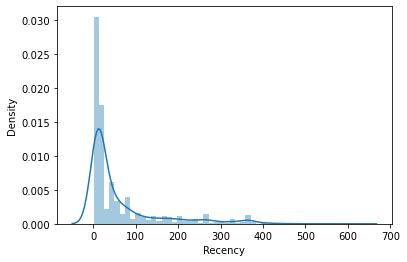

In [23]:
x = RFMScore['Recency']

ax = sns.distplot(x)

In [24]:
RFMScore.Frequency.describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

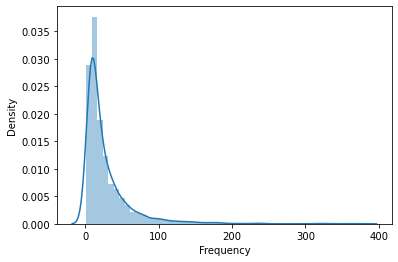

In [25]:
x1 = RFMScore['Frequency']

ax1 = sns.distplot(x1)

In [26]:
RFMScore.Monetary.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

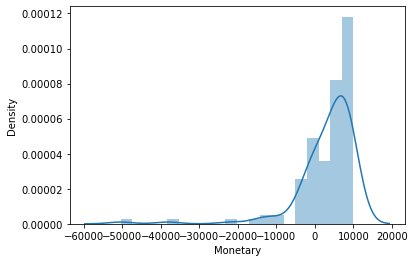

In [27]:
x2 = RFMScore.query('Monetary<10000')['Monetary']

ax2 = sns.distplot(x2)

In [28]:
quantils = RFMScore.quantile(q= [0.25,0.5,0.75])

quantils = quantils.to_dict()

In [29]:
quantils

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

Each category is divied into Quantiles.

 * For Recency Quantile 1 is considered to have high importance.
 
 
 * For Frequency and Monetary Quantile 4 is considered to have high importance

In [30]:
# FUNCTION TO CREATE R, F AND M SEGMENTS

def Rscores(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMscores(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [31]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [32]:
RFMScore['R'] = RFMScore['Recency'].apply(Rscores, args= ('Recency', quantils))
RFMScore['F'] = RFMScore['Frequency'].apply(FMscores, args = ('Frequency', quantils) )
RFMScore['M'] = RFMScore['Monetary'].apply(FMscores, args = ('Monetary', quantils) )

RFMScore.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,4,2,1
4.0,20,10,176613.0,3,3,2
5.0,18,7,41976.0,2,4,3
6.0,9,42,151822.0,1,1,2


In [35]:
RFMScore['RFMgroup']= RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore['RFMScore']= RFMScore[['R','F','M']].sum(axis=1)

In [36]:
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,4,2,1,421,7
4.0,20,10,176613.0,3,3,2,332,8
5.0,18,7,41976.0,2,4,3,243,9
6.0,9,42,151822.0,1,1,2,112,4


In [37]:
Loyalty_level = ['Platinum','Gold','Silver','Bronze']
score_cuts = pd.qcut(RFMScore.RFMScore, q=4, labels=Loyalty_level)
RFMScore['RFM_Loyalty_level']= score_cuts.values
RFMScore.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMScore,RFM_Loyalty_level
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum
1,3.0,77,18,257404.0,4,2,1,421,7,Gold
2,4.0,20,10,176613.0,3,3,2,332,8,Gold
3,5.0,18,7,41976.0,2,4,3,243,9,Silver
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze
6,8.0,234,10,135550.0,4,3,2,432,9,Silver
7,9.0,15,7,65832.0,2,4,3,243,9,Silver
8,10.0,16,22,331601.0,2,2,1,221,5,Platinum
9,11.0,9,10,771439.0,1,3,1,131,5,Platinum


In [42]:
RFMScore['RFM_Loyalty_level'].value_counts()

Platinum    1336
Gold        1209
Silver       903
Bronze       901
Name: RFM_Loyalty_level, dtype: int64

In [44]:
RFMScore.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4349 entries, 2.0 to 4372.0
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Recency            4349 non-null   int64   
 1   Frequency          4349 non-null   int32   
 2   Monetary           4349 non-null   float64 
 3   R                  4349 non-null   int64   
 4   F                  4349 non-null   int64   
 5   M                  4349 non-null   int64   
 6   RFMgroup           4349 non-null   object  
 7   RFMScore           4349 non-null   int64   
 8   RFM_Loyalty_level  4349 non-null   category
dtypes: category(1), float64(1), int32(1), int64(5), object(1)
memory usage: 293.2+ KB


### Extracting the RFMScore Data into  a CSV file:

In [49]:
RFMScore.to_csv('customer_loyalty_data.csv')